In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
x = np.linspace(1e-1,1e4,100)
y = np.linspace
plt.rcParams.update({'font.size': 18})

In [2]:
import matplotlib
matplotlib.font_manager._rebuild()

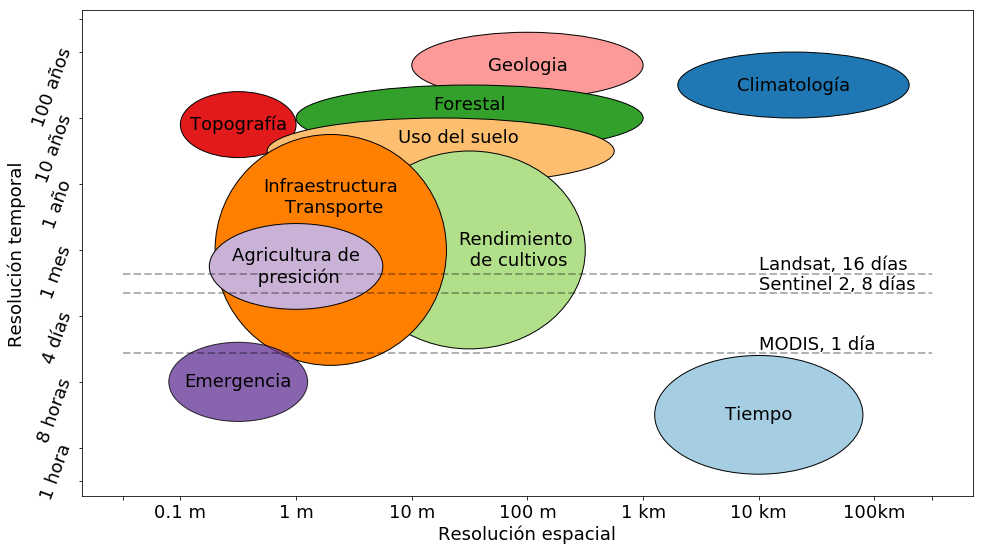

In [2]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))

plt.xticks([-1.5,-1,0,1,2,3,4,5,5.5],
           ["","0.1 m","1 m","10 m","100 m", "1 km", "10 km", "100km"])
plt.xlabel("Resolución espacial")
plt.yticks([-4.5,-4,-3,-2,-1,0,1,2,2.5],
           ["","1 hora", "8 horas", "4 días", "1 mes", "1 año", "10 años", "100 años"],rotation=70 )
plt.ylabel("Resolución temporal")

ax = plt.axes() 

ax.add_patch(patches.Ellipse((2,1.8),2,1, facecolor="#fb9a99",edgecolor="black"))
ax.annotate("Geologia",(2,1.8),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((1.5,1),3,1, facecolor="#33a02c",edgecolor="black"))
ax.annotate("Forestal",(1.5,1.2),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((-0.5,0.9),1,1, facecolor="#e31a1c",edgecolor="black"))
ax.annotate("Topografía",(-0.5,0.9),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((1.25,0.5),3,1, facecolor="#fdbf6f",edgecolor="black"))
ax.annotate("Uso del suelo",(1.4,0.7),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((1.5,-1),2,3, facecolor="#b2df8a",edgecolor="black"))
ax.annotate("Rendimiento\n de cultivos",(1.9,-1),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((0.3,-1),2,3.5, facecolor="#ff7f00",edgecolor="black"))
ax.annotate("Infraestructura\n Transporte",(0.3,-.2),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((0,-1.25),1.5,1.3, facecolor="#cab2d6",edgecolor="black"))
ax.annotate("Agricultura de\n presición",(0,-1.25),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((-.5,-3),1.2,1.2, facecolor="#6a3d9a",edgecolor="black",alpha=0.8))
ax.annotate("Emergencia",(-.5,-3),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((4.3,1.5),2,1, facecolor="#1f78b4",edgecolor="black"))
ax.annotate("Climatología",(4.3,1.5),horizontalalignment='center',
           verticalalignment='center')

ax.add_patch(patches.Ellipse((4,-3.5),1.8,1.8, facecolor='#a6cee3',edgecolor="black"))
ax.annotate("Tiempo",(4,-3.5),horizontalalignment='center',
           verticalalignment='center')


points = np.linspace(-1.5,5.5)
y1 = np.log10(16/365)
ax.annotate("Landsat, 16 días",(4,y1),horizontalalignment='left',
           verticalalignment='above')
ax.plot(points,0*points+y1, 'k--', linewidth=2, alpha=0.3)
ax.set_title('Line Type -')

y1 = np.log10(8/365)
ax.annotate("Sentinel 2, 8 días",(4,y1),horizontalalignment='left',
           verticalalignment='above')
ax.plot(points,0*points+y1, 'k--', linewidth=2, alpha=0.3)
ax.set_title('Line Type -')

y1 = np.log10(1/365)
ax.annotate("MODIS, 1 día",(4,y1),horizontalalignment='left',
           verticalalignment='above')
ax.plot(points,0*points+y1, 'k--', linewidth=2, alpha=0.3)

plt.tight_layout()
plt.savefig("fig:evst.png",dpi=300)
plt.show()

In [2]:
from scipy.interpolate import interp1d

wl = np.genfromtxt("splib07a_Engelmann-Spruce_ES-Needls-1_ASDFRa_AREF/splib07a_Wavelengths_ASD_0.35-2.5_microns_2151_ch.txt",skip_header=True)
refV = np.genfromtxt("splib07a_Engelmann-Spruce_ES-Needls-1_ASDFRa_AREF/splib07a_Engelmann-Spruce_ES-Needls-1_ASDFRa_AREF.txt",skip_header=True)
refS = np.genfromtxt("splib07a_Rangeland_C03-027_S27percent_G19percent_ASDFRa_AREF/splib07a_Rangeland_C03-027_S27%_G19%_ASDFRa_AREF.txt",skip_header=True)
refA = np.genfromtxt("splib07a_Seawater_Open_Ocean_SW2_lwch_BECKa_AREF/splib07a_Seawater_Open_Ocean_SW2_lwch_BECKa_AREF.txt",skip_header=True)
wlA = np.genfromtxt("splib07a_Seawater_Open_Ocean_SW2_lwch_BECKa_AREF/splib07a_Wavelengths_BECK_Beckman_0.2-3.0_microns.txt",skip_header=True)
refS[refS<0] = np.nan
w=np.isnan(refS)
A =  interp1d(wl[~w],refS[~w],fill_value = 'extrapolate',kind='cubic')
S = A(wl)

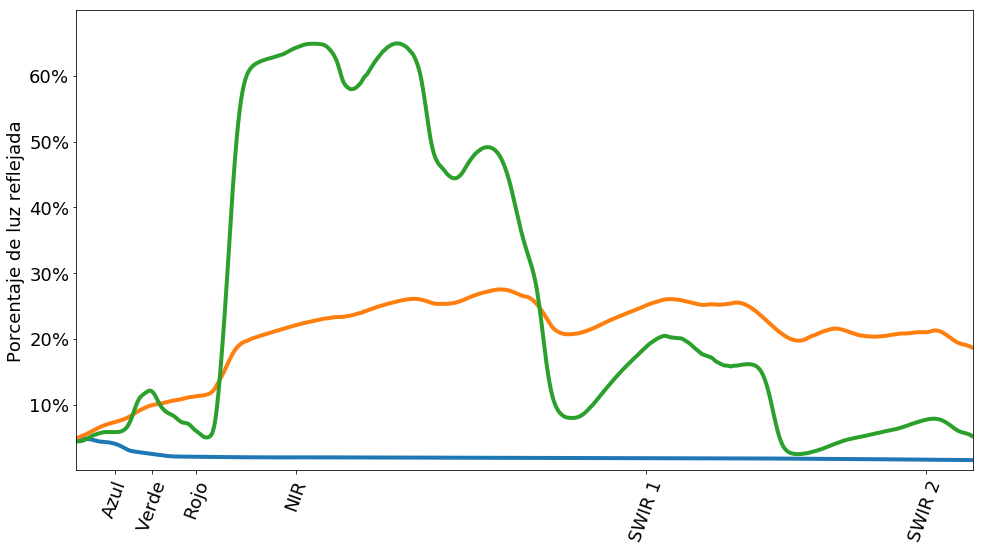

In [17]:
plt.figure(figsize=(14,8))
plt.plot(wlA,refA,lw=4)
plt.plot(wl,S,lw=4)
plt.plot(wl,refV,lw=4)
plt.xlim(0.4,2.3)
plt.ylim(0,0.7)
plt.xticks([0.482,0.561,0.654,0.865,1.608,2.200],
           ["Azul","Verde","Rojo","NIR", "SWIR 1","SWIR 2"], rotation=70)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],["10%","20%","30%","40%","50%","60%"])

plt.ylabel("Porcentaje de luz reflejada")
plt.tight_layout()
plt.savefig("fig:spec.png",dpi=300)
plt.show()

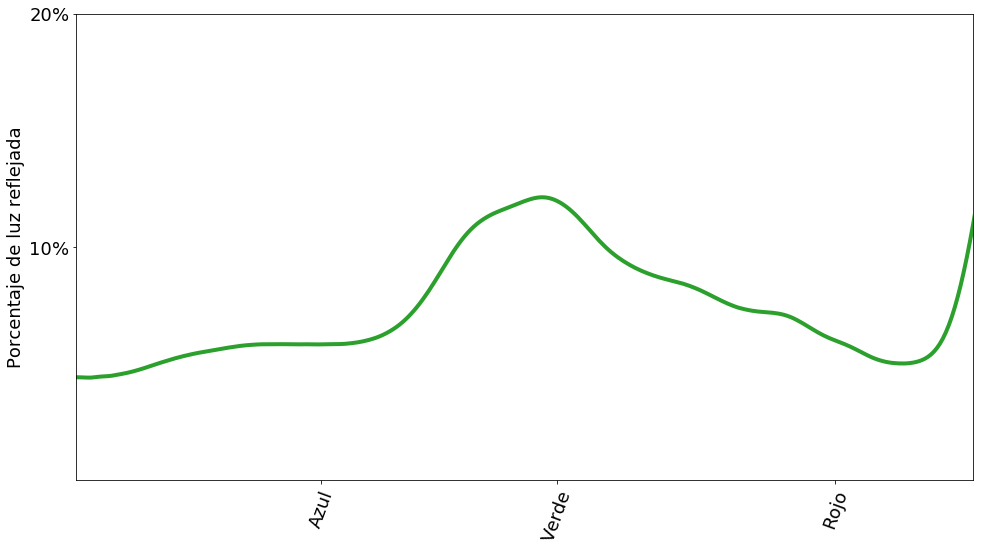

In [20]:
plt.figure(figsize=(14,8))
#plt.plot(wlA,refA,'C0',lw=4)
#plt.plot(wl,S,'C1',lw=4)
plt.plot(wl,refV,'C2',lw=4)
plt.xticks([0.482,0.561,0.654,0.865,1.608,2.200],
           ["Azul","Verde","Rojo","NIR", "SWIR 1","SWIR 2"], rotation=70)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6],["10%","20%","30%","40%","50%","60%"])
plt.xlim(0.4,0.7)
plt.ylim(0,0.2)


plt.ylabel("Porcentaje de luz reflejada")
plt.tight_layout()
plt.savefig("fig:v.png",dpi=300)
plt.show()

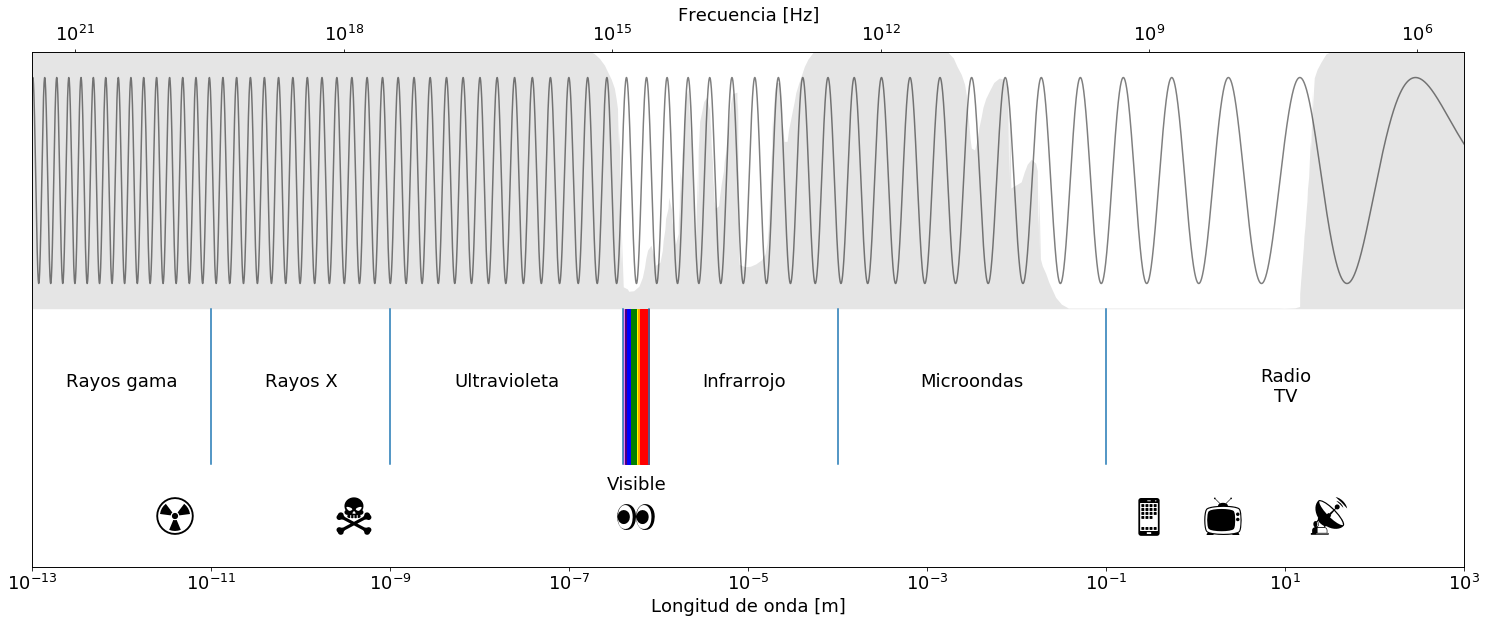

In [5]:
c =  299792458.0
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(21,9))
ax1 = fig.add_subplot(111)
x = np.logspace(-13,3,10000)
ticks = np.arange(-12,2,1)
y = np.sin(np.log(x/10**3.5)**2/np.log(40))*0.20+0.75
plt.plot(x,y,'black',alpha=0.5)

# Regiones del espectro
plt.axvline(x=10**-11,ymin=0.2,ymax=0.5)
plt.axvline(x=10**-9,ymin=0.2,ymax=0.5)
plt.axvline(x=400*10**-9,ymin=0.2,ymax=0.5)
plt.axvline(x=780*10**-9,ymin=0.2,ymax=0.5)
plt.axvline(x=10**-4,ymin=0.2,ymax=0.5)
plt.axvline(x=10**-1,ymin=0.2,ymax=0.5)

# parches
ax1.axes.add_patch(
    patches.Rectangle(
        (0.4*10**-6, 0.2),   # (x,y)
        20*10**-9,          # width
        0.3,          # height
        facecolor="violet",
        edgecolor="violet"
    )
)
ax1.axes.add_patch(
    patches.Rectangle(
        (0.42*10**-6, 0.2),   # (x,y)
        20*10**-9,          # width
        0.3,          # height
        facecolor="indigo",
        edgecolor="indigo"
    )
)
ax1.axes.add_patch(
    patches.Rectangle(
        (0.44*10**-6, 0.2),   # (x,y)
        50*10**-9,          # width
        0.3,          # height
        facecolor="blue",
        edgecolor="blue"
    )
)
ax1.axes.add_patch(
    patches.Rectangle(
        (0.49*10**-6, 0.2),   # (x,y)
        80*10**-9,          # width
        0.3,          # height
        facecolor="green",
        edgecolor="green"
    )
)
ax1.axes.add_patch(
    patches.Rectangle(
        (0.57*10**-6, 0.2),   # (x,y)
        15*10**-9,          # width
        0.3,          # height
        facecolor="yellow",
        edgecolor="yellow"
    )
)
ax1.axes.add_patch(
    patches.Rectangle(
        (0.585*10**-6, 0.2),   # (x,y)
        35*10**-9,          # width
        0.3,          # height
        facecolor="orange",
        edgecolor="orange"
    )
)
ax1.axes.add_patch(
    patches.Rectangle(
        (0.62*10**-6, 0.2),   # (x,y)
        160*10**-9,          # width
        0.3,          # height
        facecolor="red",
        edgecolor="red"
    )
)

# Texto en los ejes
ax1.text(10**-12,0.35,s="Rayos gama",horizontalalignment='center')
ax1.text(10**-10,0.35,s="Rayos X",horizontalalignment='center')
ax1.text(10**-7.699,0.35,s="Ultravioleta",horizontalalignment='center')
ax1.text(10**-6.253,0.15,s="Visible",horizontalalignment='center')
ax1.text(10**-5.054,0.35,s="Infrarrojo",horizontalalignment='center')
ax1.text(10**-2.5,0.35,s="Microondas",horizontalalignment='center')
ax1.text(10**1,0.35,s="Radio\nTV",horizontalalignment='center',verticalalignment='center')

ax1.text(0.3,0.1,s="📱",horizontalalignment='center',verticalalignment='center',fontname="EmojiOne",fontsize=40)
ax1.text(2,0.1,s="📺",horizontalalignment='center',verticalalignment='center',fontname="EmojiOne",fontsize=40)
ax1.text(30,0.1,s="📡",horizontalalignment='center',verticalalignment='center',fontname="EmojiOne",fontsize=40)
ax1.text(0.55*10**-6,0.1,s="👀",horizontalalignment='center',verticalalignment='center',fontname="EmojiOne",fontsize=40)
ax1.text(0.5*10**-9,0.1,s="☠️",horizontalalignment='center',verticalalignment='center',fontname="EmojiOne",fontsize=40)
ax1.text(0.5*10**-11,0.1,s="☢️",horizontalalignment='center',verticalalignment='center',fontname="EmojiOne",fontsize=40)



# Ventanas atmosfericas
data = np.loadtxt("atm_w.csv",delimiter=',')
xo = data[:,0]
yo = data[:,1]
plt.fill_between(xo,yo*0.5+0.5,0.5,facecolor='black',alpha=0.1)


# Configuracion ejes
plt.ylim(0,1)
#plt.yticks([])
plt.xscale('log')

plt.xlim(10**-13,1000)
plt.xlabel("Longitud de onda [m]")

ticks = np.array([6.,9.,12.,15.,18.,21.])
xticks = c/10.**ticks
plt.yticks([], [])
ax2 = ax1.twiny()
ax2.set_xlim(10**-13,1000)
ax2.set_xscale('log')
ax2.set_xticks(xticks)
ax2.set_xticklabels([r"$10^6$",r"$10^9$",r"$10^{12}$",r"$10^{15}$",r"$10^{18}$",r"$10^{21}$"])
ax2.set_xlabel("Frecuencia [Hz]")
plt.tight_layout()
plt.savefig("fig:espectro.png",dpi=300,transparent=True)
plt.show()

In [ ]:
j=0
plt.rcParams['axes.facecolor']='#fafafa'
plt.rcParams['savefig.facecolor']='#fafafa'
for i in np.linspace(1,21,801):
    plt.rcParams.update({'font.size': 18})
    fig = plt.figure(figsize=(21,6))

    x = np.linspace(0,10,500)

    y = np.exp(-(x-i)**2/0.1)*0.2+0.5
    ax1 = fig.add_subplot(111)
    ax1.text(1,0.3,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=100,fontname="EmojiOne")
    ax1.text(7,0.3,s='🏠',horizontalalignment='center',verticalalignment='center',fontsize=100,fontname="EmojiOne")
    ax1.text(9,0.3,s='🌲',horizontalalignment='center',verticalalignment='center',fontsize=100,fontname="EmojiOne")

    plt.yticks([], [])
    plt.xticks([], [])
    plt.xlim(0,10)
    plt.ylim(0,1)
    plt.plot(x,y,lw=4)
    if i > 7:
        y2 = np.exp(-(x-(2*7-i))**2/0.1)*0.2+0.5
        plt.plot(x,y2,lw=4)
    if i > 9:
        y3 = np.exp(-(x-(2*9-i))**2/0.1)*0.2+0.5
        plt.plot(x,y3,lw=4)
    ax1.text(1,0.9,s="Tiempo: {:6.3f}s".format(i-1),horizontalalignment='center',verticalalignment='center',fontsize=25)
    if i >= 13:
        ax1.text(7,0.9,s='Eco 1 = 12.0s',horizontalalignment='center',verticalalignment='center',fontsize=25)
    if i >= 17:
        ax1.text(9,0.9,s='Eco 2 = 16.0s',horizontalalignment='center',verticalalignment='center',fontsize=25)
    plt.tight_layout()
    plt.savefig("fig-funcionamiento"+str(j).zfill(3)+".png",dpi=300,transparent=False)
    j=j+1
    plt.show()

In [ ]:
# Comando para animar
# ffmpeg -r 40 -f image2 -s 6300x1800 -i fig-funcionamiento%03d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p test.mp4

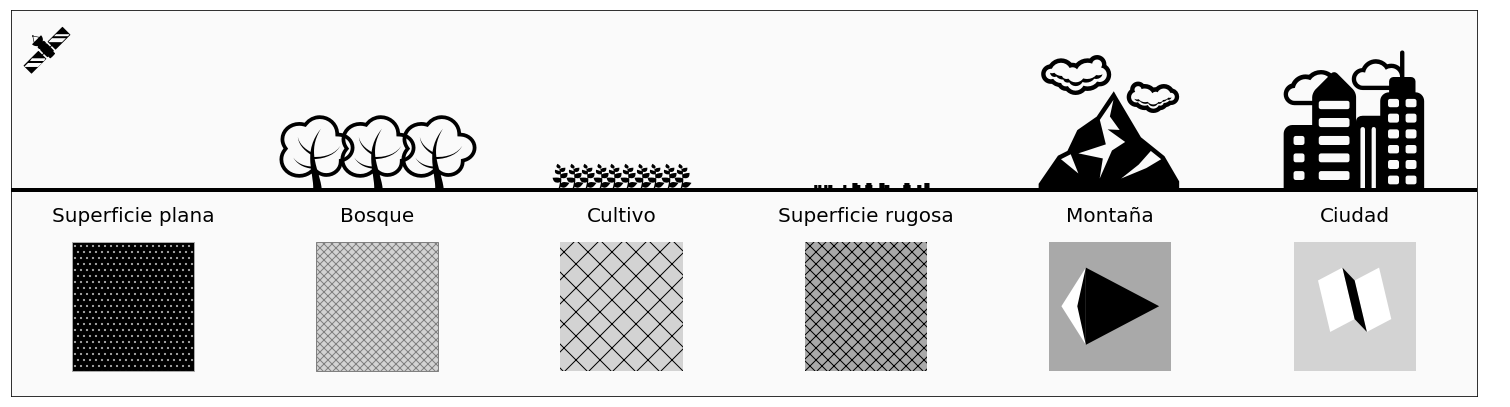

In [285]:
plt.rcParams['axes.facecolor']='#fafafa'
plt.rcParams['savefig.facecolor']='#fafafa'
plt.rcParams.update({'font.size': 18})

fig = plt.figure(figsize=(21,6))
x = np.linspace(0,12)
ax1 = fig.add_subplot(111)
for i in np.linspace(2.5,3.5,3):
    ax1.text(i,0.30,s='🌳',horizontalalignment='center',verticalalignment='bottom',fontsize=80,fontname="EmojiOne")
for i in np.linspace(4.5,5.5,10):
    ax1.text(i,0.30,s='🌿',horizontalalignment='center',verticalalignment='bottom',fontsize=30,fontname="EmojiOne")
for i in np.random.uniform(6.5,7.5,20):
    ax1.text(i,0.285,s='.',horizontalalignment='center',verticalalignment='bottom',fontsize=30)
for i in np.random.uniform(6.5,7.5,5):
    ax1.text(i,0.27,s='.',horizontalalignment='center',verticalalignment='bottom',fontsize=50)
    
ax1.text(9.3,0.30,s='🏔️',horizontalalignment='center',verticalalignment='bottom',fontsize=150,fontname="EmojiOne")
ax1.text(11.3,0.30,s='🏙️',horizontalalignment='center',verticalalignment='bottom',fontsize=150,fontname="EmojiOne")

ax1.text(1,0.20,s='Superficie plana',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(3,0.20,s='Bosque',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(5,0.20,s='Cultivo',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(7,0.20,s='Superficie rugosa',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(9,0.20,s='Montaña',horizontalalignment='center',verticalalignment='center',fontsize=20)
ax1.text(11,0.20,s='Ciudad',horizontalalignment='center',verticalalignment='center',fontsize=20)


ax1.axes.add_patch(
    patches.Rectangle(
        (0.5,0.1),   # (x,y)
        1,          # width
        -0.5,          # height
        facecolor="black",
        hatch='..',
        edgecolor="darkgrey"
    )
)

ax1.axes.add_patch(
    patches.Rectangle(
        (2.5,0.1),   # (x,y)
        1,          # width
        -0.5,          # height
        facecolor="lightgrey",
        hatch='\ \ \ / / /',
        edgecolor="grey"
    )
)

ax1.axes.add_patch(
    patches.Rectangle(
        (4.5,0.1),   # (x,y)
        1,          # width
        -0.5,          # height
        facecolor="lightgrey",
        hatch='\ /'
    )
)

ax1.axes.add_patch(
    patches.Rectangle(
        (6.5,0.1),   # (x,y)
        1,          # width
        -0.5,          # height
        facecolor="darkgrey",
        hatch='\ \ / /'
    )
)

ax1.axes.add_patch(
    patches.Rectangle(
        (8.5,0.1),   # (x,y)
        1,          # width
        -0.5,          # height
        facecolor="darkgrey"
    )
)

ax1.axes.add_patch(
    patches.Polygon(np.array([[8.8,0],[8.8,0.-0.3],[8.6,-0.15]]),True,facecolor="white")
)
ax1.axes.add_patch(
    patches.Polygon(np.array([[8.8,0],[8.8,0.-0.3],[8.73,-0.15]]),True,facecolor="black")
)
ax1.axes.add_patch(
    patches.Polygon(np.array([[8.8,0],[8.8,0.-0.3],[9.4,-0.15]]),True,facecolor="black")
)

ax1.axes.add_patch(
    patches.Rectangle(
        (10.5,0.1),   # (x,y)
        1,          # width
        -0.5,          # height
        facecolor="lightgrey"
    )
)

ax1.axes.add_patch(
    patches.Polygon(np.array([[10.7,-0.05],[10.9,0.0],[11.0,-.2],[10.8,-0.25]]),True,facecolor="white")
)
ax1.axes.add_patch(
    patches.Polygon(np.array([[11.0,-0.05],[11.2,0.0],[11.3,-.2],[11.1,-0.25]]),True,facecolor="white")
)

ax1.axes.add_patch(
    patches.Polygon(np.array([[10.9,0.0],[11.0,-0.05],[11.1,-0.25],[11.0,-.2]]),True,facecolor="black")
)


ax1.text(0.4,0.85,s='🛰️',horizontalalignment='center',verticalalignment='center',fontsize=50,fontname="EmojiOne")

plt.yticks([], [])
plt.xticks([], [])
plt.plot(x,0*x+0.3,'black',lw=4)
plt.xlim(0,12)
plt.ylim(-0.5,1)
plt.tight_layout()
plt.savefig("fig:blancos.png",dpi=300,transparent=True)

plt.show()